In [1]:
%matplotlib inline 
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

np.random.seed(0)

### Process training and test data

- load data
- split into samples and labels for training and test data

In [2]:
# read data into program

## read larger data
# training_dataset = np.load('train.npy')
# test_dataset = np.load('test.npy')

# read smaller data
training_dataset = np.load('train_small.npz')
test_dataset = np.load('test_small.npz')

In [4]:
# get training data
# X_train = training_dataset[()]['train_x']
# Y_train = training_dataset[()]['train_labels']
X_train = training_dataset['train_x']
Y_train = training_dataset['train_labels']


N,D = X_train.shape

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

X_train shape:  (24000, 2048)
Y_train shape:  (24000,)


In [5]:
# get test data
# X_test = test_dataset[()]['test_x']
# Y_test = test_dataset[()]['test_labels']
X_test = test_dataset['test_x']
Y_test = test_dataset['test_labels']

N_test,D_test = X_test.shape

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_test shape:  (1000, 2048)
Y_test shape:  (1000,)


In [6]:
# sample from training data

# choose how many samples to sample
n_sample_train = 0.1

# get index
idx_train = np.random.choice(N, int(n_sample_train*N), replace=False)

# map index to rows
x_train = X_train[idx_train,:]
y_train = Y_train[idx_train]

# centerize training data
# x_train = x_train - np.mean( x_train, axis=0 )

# deal with labels to -1 and 1
y_train[ y_train <0.5 ] = -1

n,d = x_train.shape

print("choose {} samples from the training set".format(int(n_sample_train*N)))
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print(n,d)

choose 2400 samples from the training set
x_train shape:  (2400, 2048)
y_train shape:  (2400,)
2400 2048


In [7]:
# sample from test data

# choose how many samples to sample
n_sample_test = 0.2
# get index
idx_test = np.random.choice(N_test, int(n_sample_test*N_test), replace=False)

# map index to rows
x_test = X_test[idx_test,:]
y_test = Y_test[idx_test]

# x_test = x_test - np.mean( x_test, axis=0 )

y_test[ y_test<0.5 ] = -1

n_test, d_test = x_test.shape

print("choose {} samples from the test set".format(int(n_sample_test*N_test)))
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)
print(n_test, d_test)

choose 200 samples from the test set
x_test:  (200, 2048)
y_test:  (200,)
200 2048


### Feature Selections
- [x] PCA
- [] SVD

In [23]:
# feature selection using PCA

# cov_training = np.cov( x_train )
# eigenValues_training, eigenVectors_training = np.linalg.eig( cov_training )
# print( eigenValues_training.shape )
# print( eigenVectors_training.shape)

# eigen_ind = eigenValues_training.argsort()[::-1]
# eigenValues_training = eigenValues_training[eigen_ind]
# eigenVectors_training = eigenVectors_training[:, eigen_ind]
# print(eigenValues_training)

(2000,)
(2000, 2000)
[  2.10090625e-01   1.55195644e-01   1.20590379e-01 ...,   2.19310022e-06
   2.08173105e-06   9.67088850e-13]


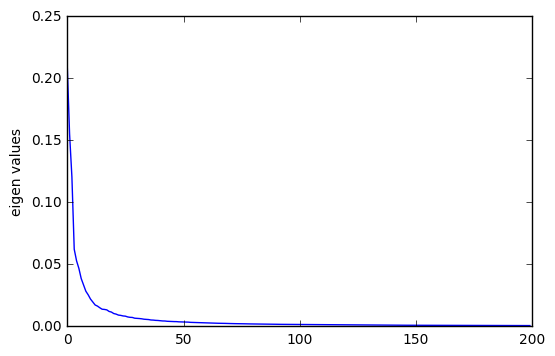

In [22]:
# # draw eigen values
# plt.plot( eigenValues_training[:200] )
# plt.ylabel( "eigen values" )
# plt.show()

In [8]:
# do feature selection using SVD

U, s, V = np.linalg.svd(x_train, full_matrices=False)
print("U", U.shape)
print("s", s.shape)
print("V", V.shape)

U (2400, 2048)
s (2048,)
V (2048, 2048)


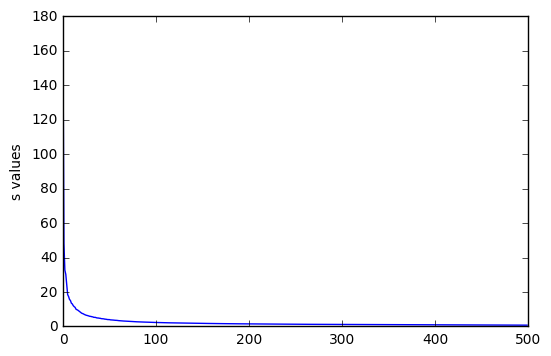

In [9]:
# draw s values
plt.plot( s[:500] )
plt.ylabel( "s values" )
plt.show()

In [12]:
# get new dataset with selected features
n_FS_SVD = 200
s[n_FS_SVD:] = 0
S = np.diag(s)
# x_train = U@S@V
x_train = U[:,:n_FS_SVD]@S[:n_FS_SVD,:n_FS_SVD]@V[:n_FS_SVD,:]
print("x_train shape:", x_train.shape)

x_train shape: (2400, 2048)


In [13]:
# get baseline
positive_rate_test = sum(y_test == 1)/n_test
baseline = positive_rate_test if positive_rate_test >= 0.5 else 1-positive_rate_test
print(baseline)

0.545


### experiment on toy dataset

In [ ]:
# # toy training dataset
# dataset = [
#     [1,2,3,4,5],
#     [1,3,4,5,6],
#     [1,3,4,5,3],
#     [1,1,2,3,3],
#     [0,1,5,4,5],
#     [0,3,5,1,3],
#     [0,2,3,5,1]
# ]

# data = np.array(dataset)

In [ ]:
# # split toy training data into samples and labels

# x_train = data[:,1:]
# y_train = data[:,0]

# # get the size of the data
# N,D = x_train.shape

# print("Data has {} samples and {} features".format(N, D))
# print("training data size:", x_train.shape)
# print("training label:", y_train.shape)

In [ ]:
# # test data
# dataset_test = [
#     [1,4,5,63,5],
#     [1,7,22,1,4],
#     [0,3,4,1,5],
#     [0,66,3,2,1]
# ]

# data_test = np.array(dataset_test)

In [ ]:
# # split test data into samples and labels

# x_test = data_test[:,1:]
# y_test = data_test[:,0]

# # get the size of the data
# N_test,D_test = x_test.shape

# print("Data has {} samples and {} features".format(N_test, D_test))
# print("test data size:", x_test.shape)
# print("test label:", y_test.shape)

### Initialize parameters 
- weight
    - mu
    - sigma
- noise

In [14]:
# Initialize Weight
w_mu = np.zeros(d)
w_sigma = np.eye(d)

#Intialize noise
sigma_square = 0.1**2

print("w_mu size:   ", w_mu.shape)
print("w_sigma size:", w_sigma.shape)

w_mu size:    (2048,)
w_sigma size: (2048, 2048)


### posterior

In [15]:
# posterior
w_mu_posterior = w_mu + \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @ \
                    (y_train - x_train@w_mu)
w_sigma_posterior = w_sigma - \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @x_train@w_sigma
    
print("w_mu_posterior: ", w_mu_posterior)
print("w_sigma_posterior: ", w_sigma_posterior)

w_mu_posterior:  [ 0.01506063  0.30026696  0.11453489 ..., -0.00074515 -0.06658336
  0.12103533]
w_sigma_posterior:  [[  9.96815276e-01   1.07487021e-03   2.31566711e-03 ...,  -3.85797270e-05
    3.19300369e-05  -1.25783203e-03]
 [  1.07487021e-03   8.65808746e-01   3.43741933e-02 ...,   1.08363402e-05
   -2.67306945e-03  -3.46096548e-03]
 [  2.31566711e-03   3.43741933e-02   7.94953565e-01 ...,  -1.97532267e-04
    4.67698983e-04   3.86404107e-03]
 ..., 
 [ -3.85797270e-05   1.08363402e-05  -1.97532267e-04 ...,   9.99987127e-01
    4.23514438e-05  -8.50179306e-05]
 [  3.19300369e-05  -2.67306945e-03   4.67698983e-04 ...,   4.23514438e-05
    9.74123628e-01  -1.93107311e-02]
 [ -1.25783203e-03  -3.46096548e-03   3.86404107e-03 ...,  -8.50179306e-05
   -1.93107311e-02   9.18470405e-01]]


### predictions

In [16]:
# prediction
y_star_mu_posterior = x_test@w_mu_posterior
y_star_sigma_posterior = x_test@w_sigma_posterior@x_test.T + \
                            sigma_square*np.eye(n_test)

var = np.sqrt(y_star_sigma_posterior.diagonal())

print("y_star_mu_posterior: ", y_star_mu_posterior)
print("y_star_sigma_posterior: ", y_star_sigma_posterior)
print("var: ", var)

y_star_mu_posterior:  [-0.20220927  0.07134242 -0.11080223  0.50023577 -0.03075466 -0.55728165
 -0.44838299 -0.54364517 -0.30088805  0.49290229  0.41968054 -0.51973481
  0.38081642  0.1397042   0.03013455  0.46581366 -0.11735891 -0.21491069
 -0.09112867 -0.13074897  0.12591407 -0.02404979  0.03767366  0.16642916
  0.04254568  0.20704846  0.17641143 -0.02090367 -0.26251113  0.87794048
  0.05553586 -0.2433097  -0.04439663 -0.13317703  0.06781683 -0.17912327
  0.28485558 -0.28169286  0.0155821  -0.00354695  0.25731995 -0.1692028
  0.73801108 -0.30873974 -0.16218615  0.14663473  0.29383245 -0.05496575
 -0.15309052  0.38736505  0.53344737  0.12596452 -0.18354675  0.71045793
 -0.02781661 -0.14180229 -0.28762085 -0.07151428 -0.0328846   0.02719732
  0.02492218  0.12617616  0.36407912 -0.39583285  0.03453122 -0.02107283
 -0.06636097  0.50287147  0.6701624   0.02287158 -0.18642418 -0.33369811
  0.34484987  0.15366478 -0.40769298 -0.16222028 -0.12673623  0.16568757
 -0.29368718  0.26779316  0.72

### experiment on prediction result

In [17]:
# fixed threshold

# get the prediction
threshold = 0

predictions = y_star_mu_posterior.copy()
predictions[ predictions<threshold ] = -1
predictions[ predictions>=threshold ] = 1

# compare predictions to true label
n_correct = sum(predictions == y_test)

print("accuaracy = ", n_correct/n_test)

accuaracy =  0.515


In [18]:
# find best threshold
max_correct, best_threshold = 0, 0
record_correct = []
for threshold in np.arange(-2,2,0.1):
    predictions = y_star_mu_posterior.copy()
    predictions[ predictions<threshold ] = -1
    predictions[ predictions>=threshold ] = 1
    n_correct = sum(predictions == y_test)
    record_correct.append( n_correct )
    if n_correct > max_correct:
        max_correct = n_correct
        best_threshold = threshold
    
record_correct = np.array( record_correct )
print( "best accuracy is : ", max_correct/n_test )
print( "best threshold is: ", best_threshold )

best accuracy is :  0.58
best threshold is:  -0.5


[109 109 109 109 109 109 109 109 109 109 110 110 111 111 113 116 113 115
 111 103 103 101 105 103  98  96  94  92  90  91  91  91  91  91  91  91
  91  91  91  91]


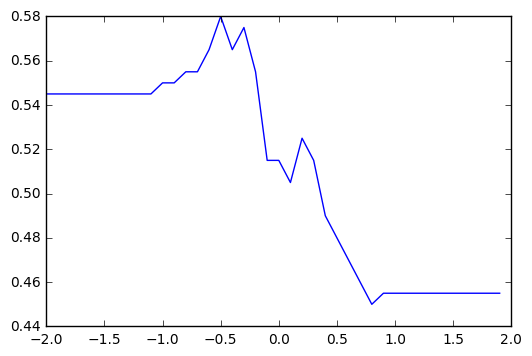

In [19]:
# plot record of correctness w.r.t threshold
print(record_correct)
# print(record_correct)
plt.plot(np.arange(-2,2,0.1), record_correct/n_test)

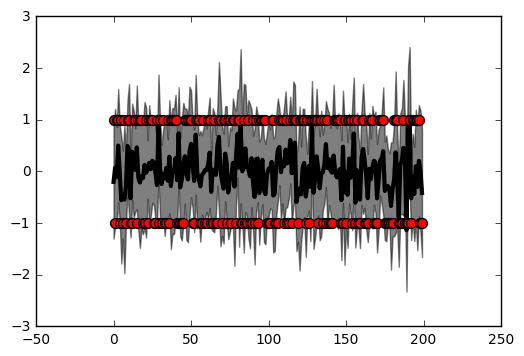

In [20]:
# plot
x_index = [i for i in range(n_test)]
plt.scatter(x_index, y_test, c='r', s=50, zorder=10)
plt.plot(x_index, y_star_mu_posterior,'k', lw=3, zorder=9)
plt.fill_between(x_index, y_star_mu_posterior - 2*var, y_star_mu_posterior + 2*var, alpha=0.5, color='k')